In [1]:
import sys
from RF_class import RF_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

model = RF_model(docking_column="Affinity(kcal/mol)")

In [27]:
# hyper_params = {}
# hyper_params['n_estimators'] = [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
# hyper_params['max_features'] = ['sqrt', 'log2']
# hyper_params['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hyper_params['min_samples_split'] = [2, 5, 10]
# hyper_params['min_samples_leaf'] = [1, 2, 4]
hyper_params = {'rf__n_estimators': [400, 500],
                'rf__max_features': ['sqrt'],
                'rf__max_depth':  [25, 50, 75, 100],
                'rf__min_samples_split': [2, 5],
                'rf__min_samples_leaf': [2, 4, 8]}

In [28]:
training_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/'
targs_df = pd.read_csv(training_path+'dock/new_ChEMBL_docking_df.csv', index_col='ID')
targs = targs_df['Affinity(kcal/mol)']
targs
feats_df = pd.read_csv(training_path+'desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID', compression='gzip')
save_path='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0'

In [29]:
falsetargs = targs_df[targs_df['Affinity(kcal/mol)']=="False"]
targs=targs.drop(index=falsetargs.index)

In [30]:
same_value_columns = feats_df.columns[~feats_df.apply(lambda col: col.nunique() == 1)]
df = feats_df[same_value_columns]
df = df.drop(index=falsetargs.index)

In [40]:
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_unbrch_alkane,fr_urea
ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL3979343,13.317538,13.317538,0.122687,-3.774721,0.484645,15.871795,547.641,518.409,547.200173,202,...,0,1,0,0,0,1,0,0,0,0
CHEMBL4089152,12.843618,12.843618,0.076179,-0.499940,0.476300,14.857143,378.432,356.256,378.169191,144,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4084046,12.034401,12.034401,0.150556,-0.720045,0.726994,11.000000,335.230,319.102,334.052735,114,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4069010,12.711747,12.711747,0.043889,-0.717034,0.738587,12.217391,308.313,294.201,308.092832,116,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4071717,11.938057,11.938057,0.063368,-0.304020,0.805570,10.166667,411.683,395.555,410.003282,126,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4069308,12.546179,12.546179,0.037344,0.037344,0.730899,14.727273,310.422,292.278,310.113984,112,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1507539,12.532657,12.532657,0.200561,-0.468584,0.916147,23.565217,316.357,296.197,316.142307,122,...,0,0,0,0,0,0,0,0,0,0
CHEMBL188678,12.914883,12.914883,0.011012,-0.011012,0.374251,14.733333,413.498,394.346,413.108564,148,...,0,0,0,0,0,0,0,0,0,0


Performing resample 23
Performing resample 35
Performing resample 7
Performing resample 27
Performing resample 5Performing resample 19

Performing resample 43
Performing resample 11
Performing resample 1
Performing resample 39
Performing resample 21
Performing resample 47
Performing resample 3
Performing resample 25
Performing resample 15
Performing resample 17
Performing resample 41
Performing resample 33
Performing resample 31
Performing resample 29
Performing resample 13
Performing resample 37
Performing resample 9
Performing resample 45
Performing resample 49
Performing resample 30
Performing resample 18
Performing resample 32
Performing resample 42
Performing resample 14
Performing resample 48
Performing resample 38
Performing resample 12
Performing resample 16
Performing resample 34
Performing resample 8
Performing resample 6
Performing resample 2
Performing resample 22
Performing resample 4
Performing resample 26
Performing resample 20
Performing resample 46
Performing resample 

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Saving final model to:
/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/final_model.pkl
{'Bias': 0.0102, 'SDEP': 0.4156, 'MSE': 0.1745, 'RMSE': 0.417, 'r2': 0.7713}


(RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=400),
 {'rf__max_depth': 100,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 2,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 400},
 {'Bias': 0.0102, 'SDEP': 0.4156, 'MSE': 0.1745, 'RMSE': 0.417, 'r2': 0.7713},
               Feature    Importance
 74         SlogP_VSA4  6.218044e-02
 94        VSA_EState4  4.560533e-02
 67           SMR_VSA7  4.292494e-02
 117         RingCount  4.182752e-02
 109  NumAromaticRings  3.478381e-02
 ..                ...           ...
 132          fr_HOCCN  6.374164e-07
 148            fr_azo  5.454328e-07
 154        fr_hdrzine  5.918099e-08
 137            fr_N_O  0.000000e+00
 172       fr_thiazole  0.000000e+00
 
 [175 rows x 2 columns],
 (array([ -8.74,  -7.72,  -7.28,  -7.92,  -9.33,  -8.35,  -8.75,  -7.52,
          -7.53,  -7.63,  -9.06,  -7.71,  -8.66,  -8.63,  -7.74,  -6.87,
          -7.46,  -8.78,  -7.53,  -8.85,  

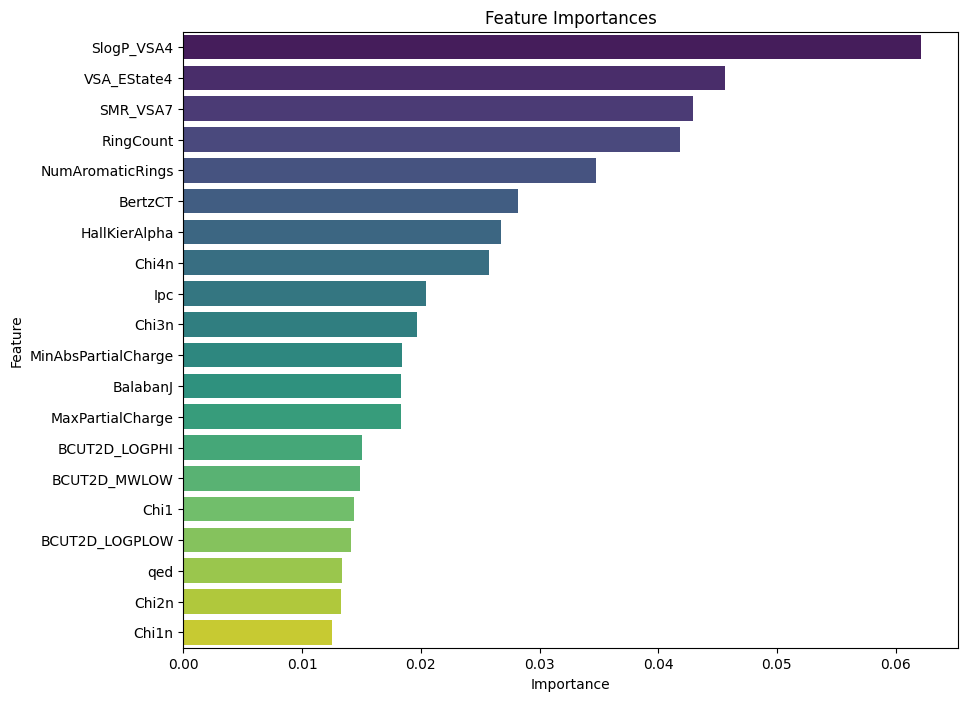

In [34]:
model.Train_Regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=df,
                      targets=pd.DataFrame(targs),
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

In [36]:
print(feats)

            MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
ID                                                                 
PMG-1               12.961991       12.961991           0.023732   
PMG-2               11.726153       11.726153           0.365889   
PMG-3               11.157383       11.157383           0.017556   
PMG-4               12.992331       12.992331           0.166030   
PMG-5               13.694922       13.694922           0.096803   
...                       ...             ...                ...   
PMG-99996           11.887395       11.887395           0.134838   
PMG-99997           12.934738       12.934738           0.095120   
PMG-99998           12.692589       12.692589           0.009371   
PMG-99999           11.175741       11.175741           0.337220   
PMG-100000          10.625443       10.625443           0.023457   

            MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  \
ID                                     

In [35]:
from glob import glob
import pandas as pd

# Define file paths and prefixes
desc_fpath = "/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/"
desc_fprefix = "PMG_rdkit_desc_*.csv"
desc_files = glob(desc_fpath + desc_fprefix)

full_data_fpath = "/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/"
full_data_fprefix = "PMG_rdkit_*.csv"

for n in range(len(desc_files)):
    desc_pref = desc_fprefix.replace('*', str(n+1))
    desc_file = desc_fpath + desc_pref

    full_pref = full_data_fprefix.replace('*', str(n+1))
    full_file = full_data_fpath + full_pref


    feats = pd.read_csv(desc_file, index_col='ID')[same_value_columns]
    preds = model.Predict(feats=feats, save_preds=True, calc_mpo=True)
    print(f"Preds {n+1} complete...")

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/en

KeyboardInterrupt: 

In [16]:
import pandas as pd
import joblib

working_dir = "/users/yhb18174/Recreating_DMTA/results/rdkit_desc/20240916_50_mp/it3/"
model = joblib.load(working_dir + 'final_model.pkl')
held_out = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/'
held_out_test_targs=  held_out + 'PMG_held_out_targ_trimmed.csv'
held_out_test_feats= held_out+ 'PMG_held_out_desc_trimmed.csv'
cols = pd.read_csv(working_dir + 'training_data/training_features.csv.gz', index_col='ID').columns
docking_column = "Affinity(kcal/mol)"

held_out_targ_df = pd.read_csv(held_out_test_targs, index_col="ID")
held_out_targ_df = held_out_targ_df[
    held_out_targ_df[docking_column] != "False"
]
held_out_targ_df = held_out_targ_df[docking_column]

held_out_feat_df = pd.read_csv(held_out_test_feats, index_col="ID")[
    cols
]
held_out_feat_df = held_out_feat_df.loc[held_out_targ_df.index]

ids = held_out_feat_df.index

In [20]:
preds = model.predict(held_out_feat_df)
results_df = pd.DataFrame({
    'True_Affinity': held_out_targ_df,
    "ID": ids,
    'Predicted_Affinity': preds
})
results_df = results_df.set_index('ID')

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import json

true = np.array(results_df['True_Affinity']).astype(float)
pred = np.array(results_df['Predicted_Affinity']).astype(float)

errors = true - pred
# Calculate performance metrics
bias = np.mean(errors)
sdep = (np.mean((true - pred - (np.mean(true - pred))) ** 2)) ** 0.5
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
r2 = r2_score(true, pred)
r_pearson, p_pearson = pearsonr(true, pred)

stats = {
    "Bias": round(bias, 3),
    "SDEP": round(sdep, 3),
    "MSE": round(mse, 3),
    "RMSE": round(rmse, 3),
    "r2": round(r2, 3),
    "pearson_r": round(r_pearson, 3),
    "pearson_p": round(p_pearson, 3),
}
stats
with open(f"{working_dir}/held_out_test/held_out_stats.json", "w") as f:
    json.dump(stats, f, indent=4)

In [19]:
import joblib
import pandas as pd

working_dir = "/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/"
model = joblib.load(working_dir + 'final_model.pkl')
fi = model.feature_importances_

feat_imp = pd.read_csv("/users/yhb18174/Recreating_DMTA/results/rdkit_desc/20241002_10_rmp/it1/feature_importance_df.csv", index_col="Unnamed: 0").sort_index(axis=0)
feats = feat_imp['Feature'].tolist()
feat_imp

,Feature,Importance
0,MaxAbsEStateIndex,0.008430
1,MaxEStateIndex,0.008242
2,MinAbsEStateIndex,0.008717
3,MinEStateIndex,0.007141
4,qed,0.012433
...,...,...
205,fr_thiazole,0.000000
206,fr_thiocyan,0.000000
207,fr_thiophene,0.000000
208,fr_unbrch_alkane,0.000187


In [6]:
fi

array([8.35445062e-03, 7.85499575e-03, 6.10145285e-03, 5.78919257e-03,
       1.16338390e-02, 8.21778931e-03, 4.11937751e-03, 5.78101008e-03,
       5.66683823e-03, 4.48533189e-03, 0.00000000e+00, 1.67969356e-02,
       4.38168364e-03, 4.26350338e-03, 1.96962301e-02, 6.36632284e-03,
       4.22040414e-03, 3.42596702e-03, 4.24024783e-03, 1.61038803e-02,
       5.88127801e-03, 5.90617612e-03, 1.30040184e-02, 1.51661362e-02,
       6.15079043e-03, 5.91220669e-03, 1.22750085e-02, 1.83713489e-02,
       2.51772792e-02, 5.00519971e-03, 7.94629184e-03, 6.10111389e-03,
       1.29834283e-02, 1.40198972e-02, 5.69388603e-03, 1.33332568e-02,
       6.38785251e-03, 1.89419724e-02, 9.04061959e-03, 2.92588426e-02,
       7.45866771e-03, 2.54646893e-02, 1.82852408e-02, 3.26043347e-03,
       4.08506562e-03, 3.88766640e-03, 1.01990816e-02, 3.18554489e-03,
       3.17667232e-03, 2.27289173e-03, 1.66983317e-03, 3.96679978e-03,
       1.97921584e-03, 3.08871575e-03, 2.87045655e-03, 9.65507925e-04,
      

In [20]:
importance_df = pd.DataFrame({
    "Feature": feats,
    "Importance": fi
})
importance_df.to_csv(working_dir + 'feature_importance_df.csv')